In [12]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import os
import re
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from get_tweets import get_tweets_by_search_term
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.max_columns", None)

In [13]:
# Import NLTK lexicon
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/brightkoech/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/brightkoech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/brightkoech/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/brightkoech/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
# Fetch the Tweets
keywords = input("Enter keywords, hashtags separated by commas: ")
keywords = list(set(keywords.split(",")))
get_tweets_by_search_term(keywords)

,UserId,TweetId,tweet,location,created
0,david mureithi,1521076733528715265,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,,02-May-2022
1,Alpha Radio,1521075820466524160,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,,02-May-2022
2,HATER,1521075582188113920,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,"Nairobi, Kenya",02-May-2022
3,felix asoha,1521075418002038784,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Nairobi.,02-May-2022
4,MULATYA MUNGAI,1521075295855517696,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,,02-May-2022
...,...,...,...,...,...
4885,Señor Mandere 🇰🇪,1518078941746974721,"Don’t blow your own TRUMPET! Mzee Mwai Kibaki, you did us PROUD as the 3rd! #RIPMwaiKibaki Cc. @...","Nairobi, Kenya",24-Apr-2022
4886,Philemon ANTHONY,1518072400407060480,Fact: President Uhuru Kenyatta left William Ruto for Raila Odinga because of Ruto's dishonesty a...,Kenya,24-Apr-2022
4887,Titus O. Ogira,1518068957844066306,"@NdunguWainaina Owners of capital, you can't rubbish the guy success in the corporate world, atl...",,24-Apr-2022
4888,City Today,1518065315451752448,"President of Kenya, Uhuru Kenyatta who was billed to open @ZITF1 on Friday is no longer coming t...",Anywhere koBulawayo,24-Apr-2022


In [15]:
# Save tweets to pickle file and reload to DF - Avoid API calls
this_file_path = os.path.abspath("__file__")
BASE_DIR = os.path.dirname(this_file_path)
tweet_pickle_file = os.path.join(BASE_DIR, "tweets", "tweet_list.pkl")
tweets_df = pd.read_pickle(tweet_pickle_file)
tweets_df.head()


,UserId,TweetId,tweet,location,created
0,david mureithi,1521076733528715265,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,,02-May-2022
1,Alpha Radio,1521075820466524160,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,,02-May-2022
2,HATER,1521075582188113920,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,"Nairobi, Kenya",02-May-2022
3,felix asoha,1521075418002038784,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Nairobi.,02-May-2022
4,MULATYA MUNGAI,1521075295855517696,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,,02-May-2022


In [16]:
# Primary exploratory analysis
print('Dataset shape:', tweets_df.shape)
print('Dataset columns:', tweets_df.columns)
tweets_df.info()

Dataset shape: (4890, 5)
Dataset columns: Index(['UserId', 'TweetId', 'tweet', 'location', 'created'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UserId    4890 non-null   object
 1   TweetId   4890 non-null   int64 
 2   tweet     4890 non-null   object
 3   location  4890 non-null   object
 4   created   4890 non-null   object
dtypes: int64(1), object(4)
memory usage: 191.1+ KB


In [17]:
# Drop all columns except for Tweet and create a list of all words
tweets_only_df = tweets_df.drop(['UserId', 'TweetId', 'location', 'created'], axis=1)
tweets_only_df.head()

,tweet
0,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...
1,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...
2,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...
3,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...
4,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...


In [18]:
# Remove http links from tweets
def remove_http_https(text):
    return re.sub(r'http\S+', '', text)

tweets_only_df['link_removed'] = tweets_only_df['tweet'].apply(lambda x: remove_http_https(x))
tweets_only_df.head()

,tweet,link_removed
0,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...
1,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...
2,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...
3,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...
4,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...


(-0.5, 399.5, 199.5, -0.5)

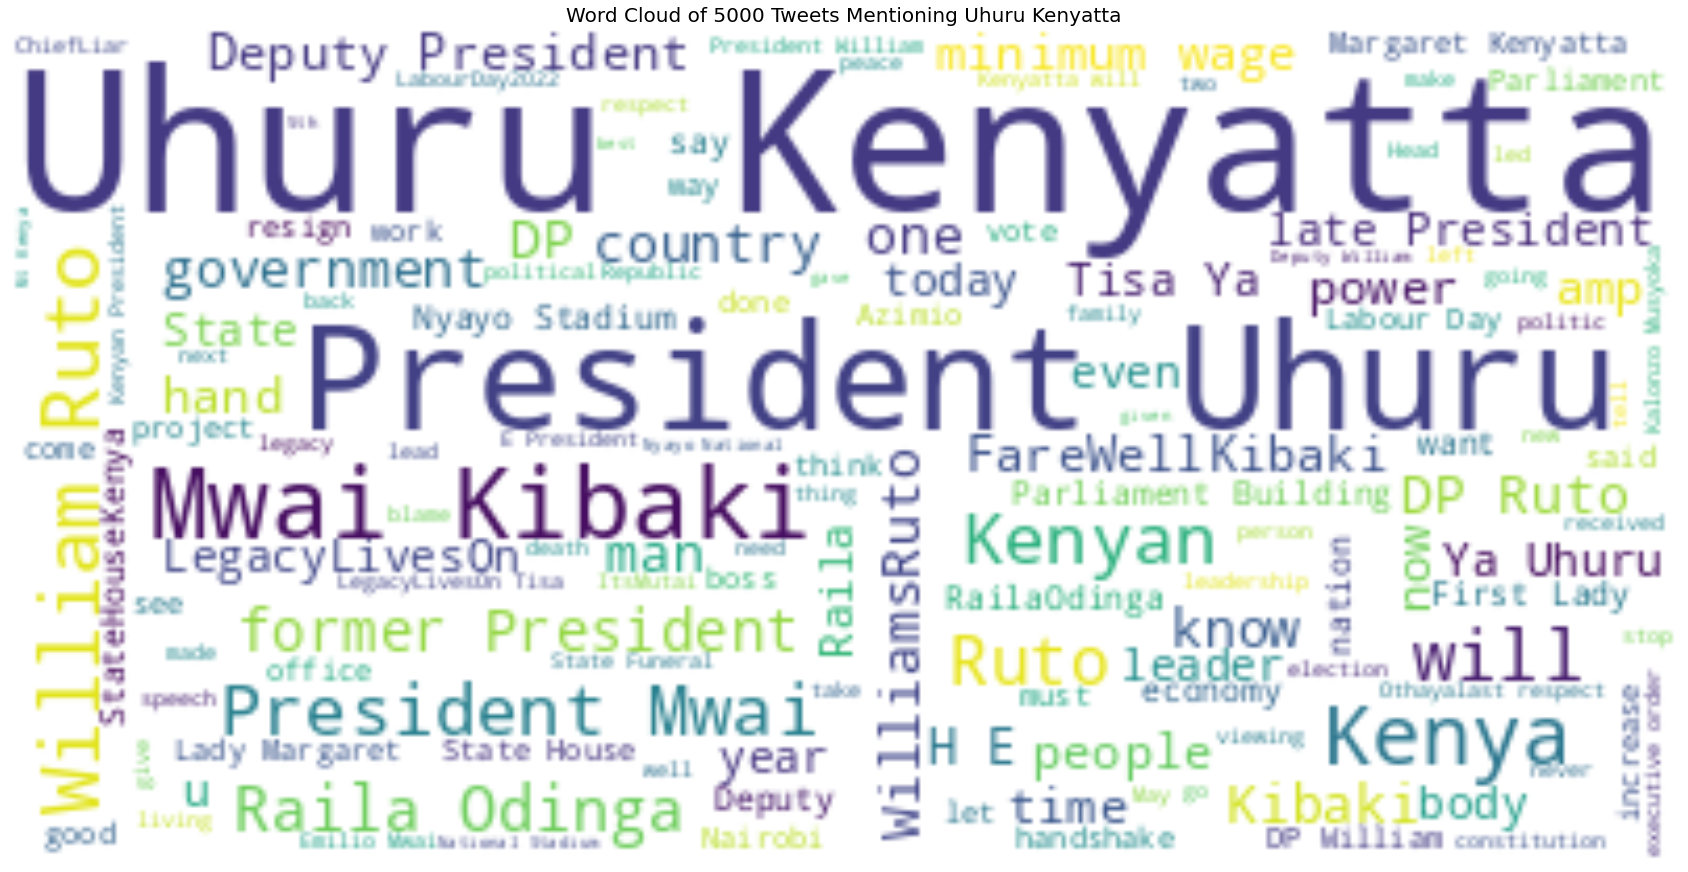

In [19]:
all_final_tweets = ' '.join(word for word in tweets_only_df['link_removed'])
fig, ax = plt.subplots(figsize=(30,30))
wordcloud_all_tweets = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(all_final_tweets)
ax.imshow(wordcloud_all_tweets, interpolation='bilinear')
ax.set_title('Word Cloud of 5000 Tweets Mentioning Uhuru Kenyatta', fontsize=20)
ax.axis("off")

In [20]:
# Remove punctuations
#string.punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweets_only_df['tweet_punct'] = tweets_only_df['tweet'].apply(lambda x: remove_punct(x))
tweets_only_df.head()

,tweet,link_removed,tweet_punct
0,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...
1,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...
2,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’s...
3,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...
4,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,MuratheDavid You have forgotten how hon raila he did after president uhuru Kenyatta took the off...


In [21]:
# Tokenize the tweets
def tokenize(text):
    text = re.split('\W+', text)
    return text

tweets_only_df['tweet_tokenized'] = tweets_only_df['tweet_punct'].apply(lambda x: tokenize(x))
tweets_only_df.head()

,tweet,link_removed,tweet_punct,tweet_tokenized
0,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,"[UHURU, Kenyatta, is, experiencing, nightmares, on, discovering, how, miserably, he, has, failed..."
1,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,"[Bahati, MP, Kimani, Ngunjiri, has, slammed, President, Uhuru, Kenyatta, for, attacking, his, de..."
2,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’s...,"[AtwoliDza, How, Many, Kenyans, Remember, when, all, that, Mattered, to, Uhuru, Kenyatta, was, R..."
3,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,"[Bahati, MP, Kimani, Ngunjiri, has, slammed, President, Uhuru, Kenyatta, for, attacking, his, de..."
4,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,MuratheDavid You have forgotten how hon raila he did after president uhuru Kenyatta took the off...,"[MuratheDavid, You, have, forgotten, how, hon, raila, he, did, after, president, uhuru, Kenyatta..."


In [22]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

tweets_only_df['tweet_nonstop'] = tweets_only_df['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweets_only_df.head()

,tweet,link_removed,tweet_punct,tweet_tokenized,tweet_nonstop
0,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,"[UHURU, Kenyatta, is, experiencing, nightmares, on, discovering, how, miserably, he, has, failed...","[UHURU, Kenyatta, experiencing, nightmares, discovering, miserably, failed, president, especiall..."
1,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,"[Bahati, MP, Kimani, Ngunjiri, has, slammed, President, Uhuru, Kenyatta, for, attacking, his, de...","[Bahati, MP, Kimani, Ngunjiri, slammed, President, Uhuru, Kenyatta, attacking, deputy, William, ..."
2,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’s...,"[AtwoliDza, How, Many, Kenyans, Remember, when, all, that, Mattered, to, Uhuru, Kenyatta, was, R...","[AtwoliDza, How, Many, Kenyans, Remember, Mattered, Uhuru, Kenyatta, Reggae, Dance, Moves, The, ..."
3,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,"[Bahati, MP, Kimani, Ngunjiri, has, slammed, President, Uhuru, Kenyatta, for, attacking, his, de...","[Bahati, MP, Kimani, Ngunjiri, slammed, President, Uhuru, Kenyatta, attacking, deputy, William, ..."
4,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,MuratheDavid You have forgotten how hon raila he did after president uhuru Kenyatta took the off...,"[MuratheDavid, You, have, forgotten, how, hon, raila, he, did, after, president, uhuru, Kenyatta...","[MuratheDavid, You, forgotten, hon, raila, president, uhuru, Kenyatta, took, office, oldered, su..."


In [23]:
# Stemming and lemmatization
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweets_only_df['tweet_stemmed'] = tweets_only_df['tweet_nonstop'].apply(lambda x: stemming(x))

wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
tweets_only_df['tweet_lemmatized'] = tweets_only_df['tweet_stemmed'].apply(lambda x: lemmatizer(x))
tweets_only_df.head()

,tweet,link_removed,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized
0,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,UHURU Kenyatta is experiencing nightmares on discovering how miserably he has failed as a presid...,"[UHURU, Kenyatta, is, experiencing, nightmares, on, discovering, how, miserably, he, has, failed...","[UHURU, Kenyatta, experiencing, nightmares, discovering, miserably, failed, president, especiall...","[uhuru, kenyatta, experienc, nightmar, discov, miser, fail, presid, especi, second, term, hi, po...","[uhuru, kenyatta, experienc, nightmar, discov, miser, fail, presid, especi, second, term, hi, po..."
1,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,"[Bahati, MP, Kimani, Ngunjiri, has, slammed, President, Uhuru, Kenyatta, for, attacking, his, de...","[Bahati, MP, Kimani, Ngunjiri, slammed, President, Uhuru, Kenyatta, attacking, deputy, William, ...","[bahati, mp, kimani, ngunjiri, slam, presid, uhuru, kenyatta, attack, deputi, william, ruto, lab...","[bahati, mp, kimani, ngunjiri, slam, presid, uhuru, kenyatta, attack, deputi, william, ruto, lab..."
2,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,@AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’...,AtwoliDza How Many Kenyans Remember when all that Mattered to Uhuru Kenyatta was Reggae and it’s...,"[AtwoliDza, How, Many, Kenyans, Remember, when, all, that, Mattered, to, Uhuru, Kenyatta, was, R...","[AtwoliDza, How, Many, Kenyans, Remember, Mattered, Uhuru, Kenyatta, Reggae, Dance, Moves, The, ...","[atwolidza, how, mani, kenyan, rememb, matter, uhuru, kenyatta, regga, danc, move, the, economi,...","[atwolidza, how, mani, kenyan, rememb, matter, uhuru, kenyatta, regga, danc, move, the, economi,..."
3,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,Bahati MP Kimani Ngunjiri has slammed President Uhuru Kenyatta for attacking his deputy William ...,"[Bahati, MP, Kimani, Ngunjiri, has, slammed, President, Uhuru, Kenyatta, for, attacking, his, de...","[Bahati, MP, Kimani, Ngunjiri, slammed, President, Uhuru, Kenyatta, attacking, deputy, William, ...","[bahati, mp, kimani, ngunjiri, slam, presid, uhuru, kenyatta, attack, deputi, william, ruto, lab...","[bahati, mp, kimani, ngunjiri, slam, presid, uhuru, kenyatta, attack, deputi, william, ruto, lab..."
4,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,@Murathe_David_ You have forgotten how hon raila he did after president uhuru Kenyatta took the ...,MuratheDavid You have forgotten how hon raila he did after president uhuru Kenyatta took the off...,"[MuratheDavid, You, have, forgotten, how, hon, raila, he, did, after, president, uhuru, Kenyatta...","[MuratheDavid, You, forgotten, hon, raila, president, uhuru, Kenyatta, took, office, oldered, su...","[murathedavid, you, forgotten, hon, raila, presid, uhuru, kenyatta, took, offic, older, support,...","[murathedavid, you, forgotten, hon, raila, presid, uhuru, kenyatta, took, offic, older, support,..."


(-0.5, 399.5, 199.5, -0.5)

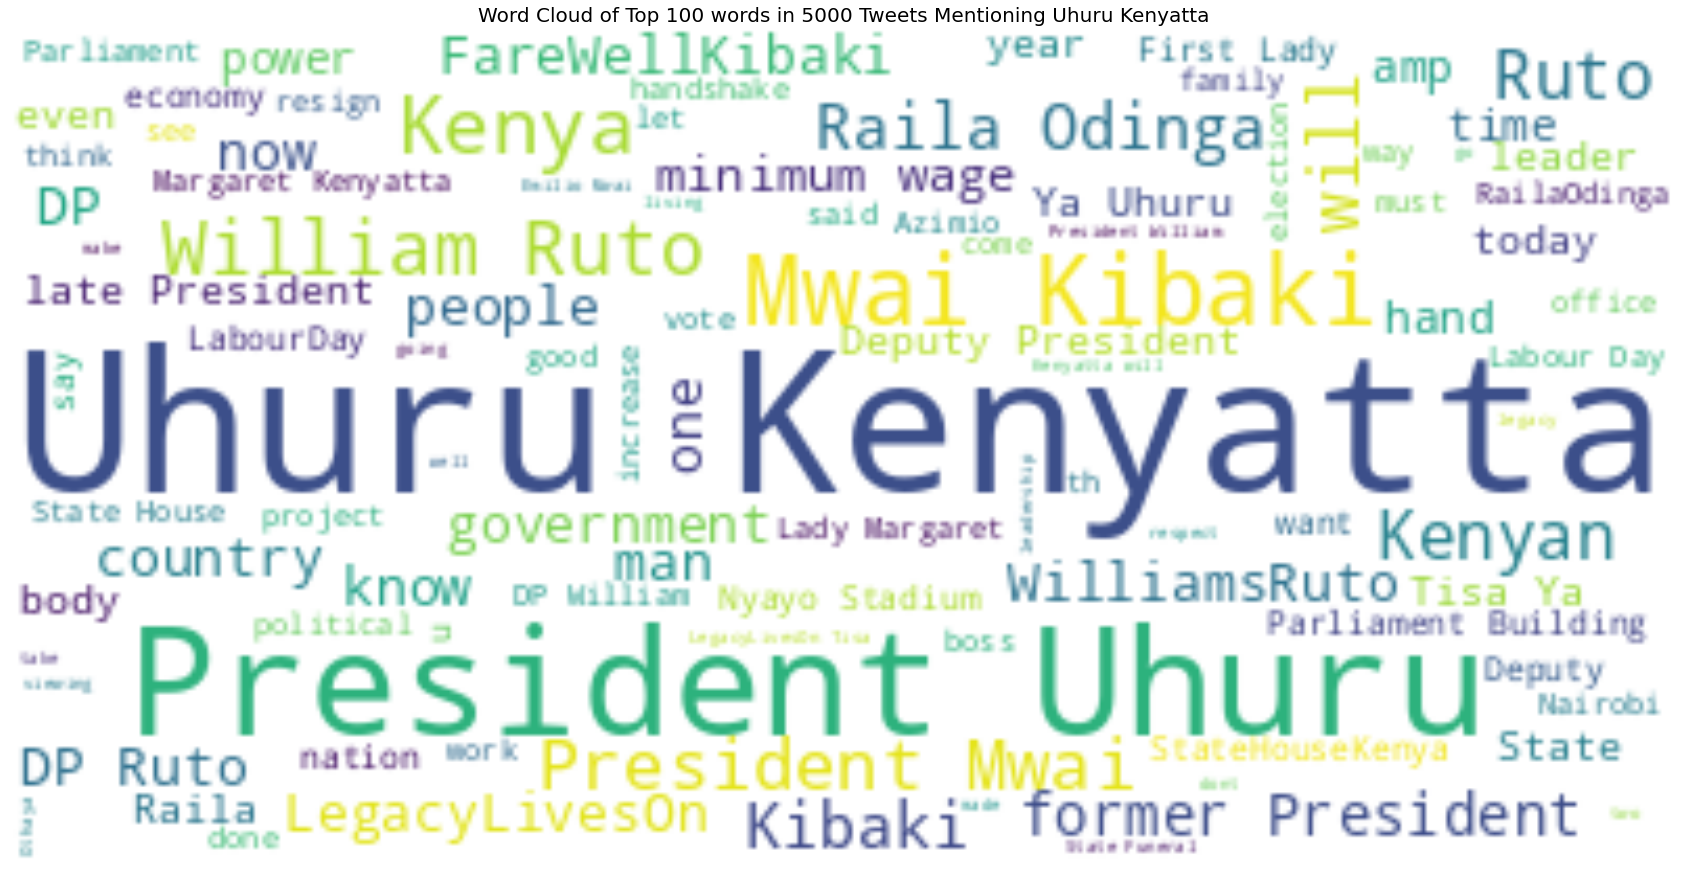

In [25]:
all_final_tweets = ' '.join(word for word in tweets_only_df['tweet_punct'])
fig, ax = plt.subplots(figsize=(30,30))
wordcloud_all_tweets = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_final_tweets)
ax.imshow(wordcloud_all_tweets, interpolation='bilinear')
ax.set_title('Word Cloud of Top 100 words in 5000 Tweets Mentioning Uhuru Kenyatta', fontsize=20)
ax.axis("off")